In [51]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np

In [3]:
x,y = make_classification(n_samples= 5000,
                          n_features= 40,
                          n_informative= 3,
                          n_redundant=2,
                          n_repeated= 0,
                          n_classes=2,
                          n_clusters_per_class=3,
                          weights=None,
                          flip_y=0.5,
                          class_sep=0.1,
                          hypercube=True,
                          shift=0.0,
                          scale = 1.0,
                          shuffle=True,
                          random_state=2
                        )

In [4]:
X, Y = make_classification(
    n_samples=5000, n_features=40, n_informative=3,
    n_redundant=2, n_repeated=0, n_classes=2,
    n_clusters_per_class=3, weights=None, flip_y=0.05,
    class_sep=0.1, hypercube=True, shift=0.0,
    scale=1.0, shuffle=True, random_state=2)

In [5]:
y == Y

array([False, False, False, ...,  True,  True,  True])

In [6]:
y.mean()

0.496

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_val, y_train,y_val = train_test_split(x,y,test_size=0.2,random_state=24)

In [9]:
X_train, X_val, Y_train,Y_val = train_test_split(X,Y,test_size=0.2,random_state=24)

In [10]:
from sklearn.metrics import roc_auc_score

In [11]:
import xgboost as xgb

C:\Users\sid\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [59]:
xgb_mode_3 = xgb.XGBClassifier(n_estimators = 1000,
                               max_depth = 0,
                               learning_rate = 0.1,
                               verbosity = 1,
                               objective='binary:logistic',
                               use_label_encoder = False,
                               n_jobs = -1,
                               tree_method = 'hist',
                               grow_policy = 'lossguide'
                                )

In [60]:
max_leave_values = list(range(1,21,1))
max_leave_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [61]:
eval_set = [(x_train, y_train),(x_val, y_val)]
eval_set_2 = [(X_train, Y_train),(X_val,Y_val)]

In [62]:
val_aucs = []

for max_leaves in max_leave_values:
    xgb_mode_3.set_params(**{'max_leaves':max_leaves})
    
    xgb_mode_3.fit(x_train,y_train, eval_set= [(x_train, y_train),(x_val, y_val)], eval_metric='auc', verbose=False, early_stopping_rounds=30)
    
    
    val_pred_prob = xgb_mode_3.predict_proba(x_val)[:,-1]
    val_aucs.append(roc_auc_score(y_val,val_pred_prob))

In [63]:
val_aucs_2 = []

for max_leaves in max_leave_values:
    xgb_mode_3.set_params(**{'max_leaves':max_leaves})
    
    xgb_mode_3.fit(X_train,Y_train, eval_set= eval_set_2, eval_metric='auc', verbose=False, early_stopping_rounds=30)
    
    
    val_pred_prob = xgb_mode_3.predict_proba(X_val)[:,-1]
    val_aucs_2.append(roc_auc_score(y_val,val_pred_prob))

In [64]:
max_leaves_df_2 = pd.DataFrame({'max_leaves':max_leave_values, 'validation auc':val_aucs_2})
max_leaves_df_2

,max_leaves,validation auc
0,1,0.50000
1,2,0.51669
2,3,0.51669
3,4,0.51669
4,5,0.51669
5,6,0.51669
6,7,0.51669
7,8,0.51669
8,9,0.51669
9,10,0.51669


In [16]:
max_leaves_df = pd.DataFrame({'max_leaves':max_leave_values, 'validation auc':val_aucs})
max_leaves_df

,max_leaves,validation auc
0,1,0.500000
1,2,0.642364
2,3,0.642364
3,4,0.642364
4,5,0.642364
5,6,0.642364
6,7,0.642364
7,8,0.642364
8,9,0.642364
9,10,0.642364


<AxesSubplot:xlabel='max_leaves'>

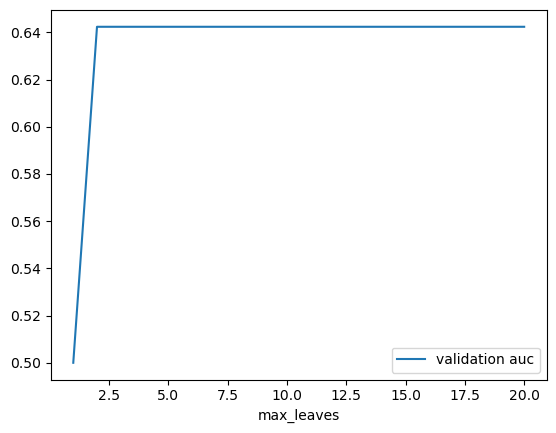

In [17]:
max_leaves_df.set_index('max_leaves').plot()

<AxesSubplot:xlabel='max_leaves'>

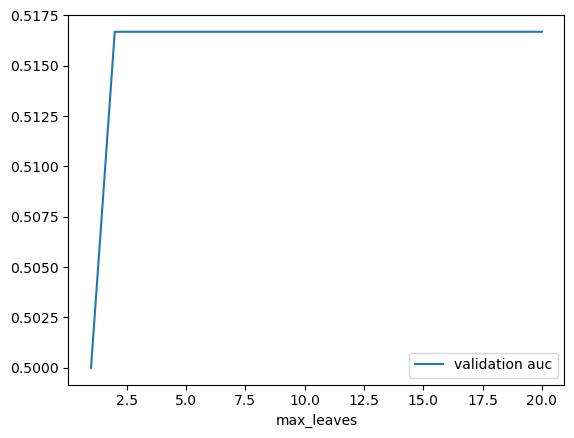

In [28]:
max_leaves_df_2.set_index('max_leaves').plot()

In [18]:
#pip install shap

In [19]:
xgb_mode_3.set_params(**{'max_leaves':20})
    
xgb_mode_3.fit(x_train,y_train, eval_set= [(x_train, y_train),(x_val, y_val)], eval_metric='auc',\
                   verbose=False, early_stopping_rounds=30)

[11:30:19] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:30:19] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, grow_policy='lossguide', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=0, max_leaves=20, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimator=1000, n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='hist', use_label_encoder=False, ...)

In [20]:
x_val.shape

(1000, 40)

In [21]:
feature_names = ['Feature{number}'.format(number = number) for number in range(x_val.shape[1])]

In [22]:
x_val_df = pd.DataFrame(data = x_val, columns=feature_names)

In [23]:
x_val_df

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature30,Feature31,Feature32,Feature33,Feature34,Feature35,Feature36,Feature37,Feature38,Feature39
0,-0.622565,0.661164,0.035764,0.811169,-0.795613,-0.630950,0.357028,0.772833,-0.556567,-1.029251,...,-2.397719,-1.296873,0.457723,0.145594,-0.092684,-1.294515,-1.036669,0.641327,-0.636598,-2.061655
1,-0.214824,-1.474706,2.144514,0.868992,0.280887,0.041886,-0.159635,1.168693,-0.360379,2.026280,...,0.132521,-0.986861,-0.933377,1.065191,0.511194,-0.815505,-0.734266,-1.186376,-1.610570,-2.548019
2,-0.618586,0.687609,2.279156,-0.526336,-0.304657,0.743995,-1.388566,-0.075723,0.742572,-0.265234,...,-0.865884,-0.650142,0.743789,0.582138,-1.181165,1.674748,0.553967,-0.685163,-1.796774,0.101157
3,-1.009265,-0.037632,-1.069586,1.095926,0.994152,-1.299083,1.589794,-0.380910,0.452471,-0.461744,...,-0.399795,-1.404356,1.467470,0.372704,-0.956007,0.427966,1.373484,2.129224,0.484553,-1.636330
4,0.376506,-0.742036,0.770286,1.514843,1.444178,-1.608397,-0.163369,-1.118461,-1.390185,-1.584529,...,-0.001263,-1.106332,0.553098,-0.930598,0.167417,0.694779,-0.220340,0.286599,-0.830433,0.529593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.848082,0.028250,-1.560720,1.350813,1.053236,-0.419216,1.587379,-1.013411,0.558028,0.233065,...,0.771287,0.438002,0.696874,-0.640873,0.205574,-0.107413,1.562427,0.380639,-0.095149,0.196168
996,1.118075,-1.002805,0.296028,0.224878,-2.147779,-0.135572,-0.306869,-0.577389,-0.306003,-0.092647,...,1.189086,-0.033368,-0.215302,0.138573,-0.004508,-0.147795,0.630846,-0.081929,0.976920,-0.345294
997,-0.464340,0.474127,-1.151309,0.595920,-1.670778,0.182102,0.944897,-0.809814,-0.017465,1.331681,...,0.098067,0.450905,-0.584763,-1.224146,-1.042587,-1.416330,0.582964,0.362746,0.588438,-0.639582
998,1.514303,0.526830,0.417943,-0.756933,0.165325,0.370582,-0.448287,1.369290,-0.470634,-0.894979,...,-0.707036,-0.970315,0.034959,1.074296,-0.649381,-0.353248,-0.249677,0.021632,0.469821,0.234200


In [1]:
#pd.DataFrame(x_val, columns=x_val)

In [29]:
import shap

In [30]:
explainer = shap.explainers.Tree(xgb_mode_3, data = x_val_df)

In [31]:
shap_values = explainer(x_val_df)

In [32]:
shap_values.base_values.shape

(1000,)

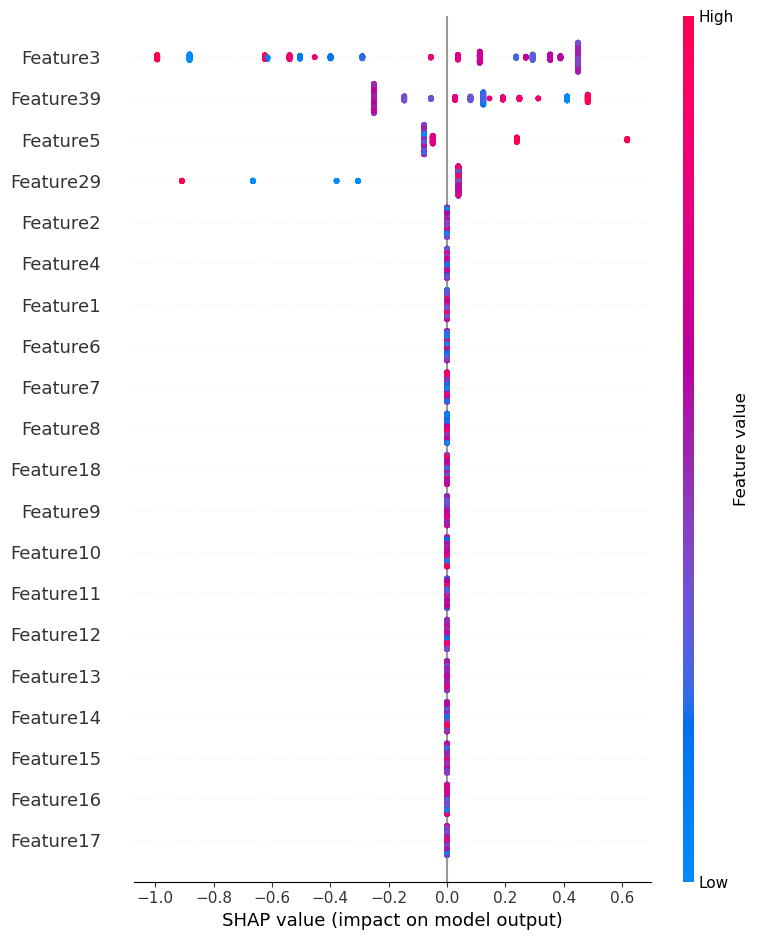

In [33]:
shap.summary_plot(shap_values.values, x_val_df)

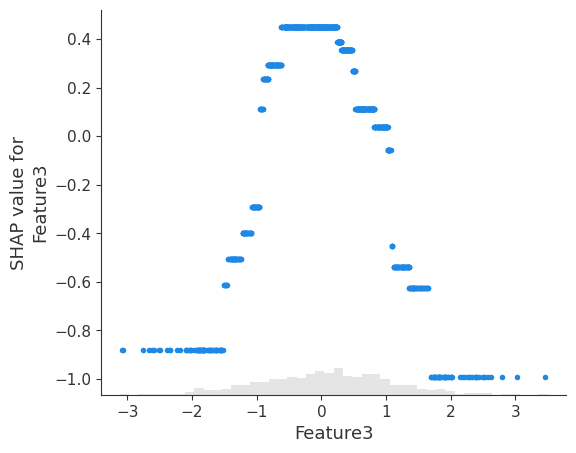

In [38]:
shap.plots.scatter(shap_values[:, 'Feature3'])

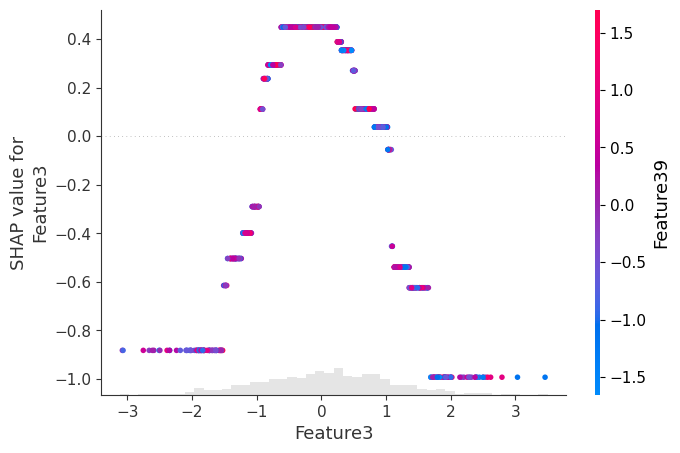

In [42]:
 shap.plots.scatter(shap_values[:, 'Feature3'],color = shap_values[:,'Feature39'])

## Exercise 6.02: Plotting SHAP Interactions, Feature Importance, and Reconstructing Predicted Probabilities from SHAP Values

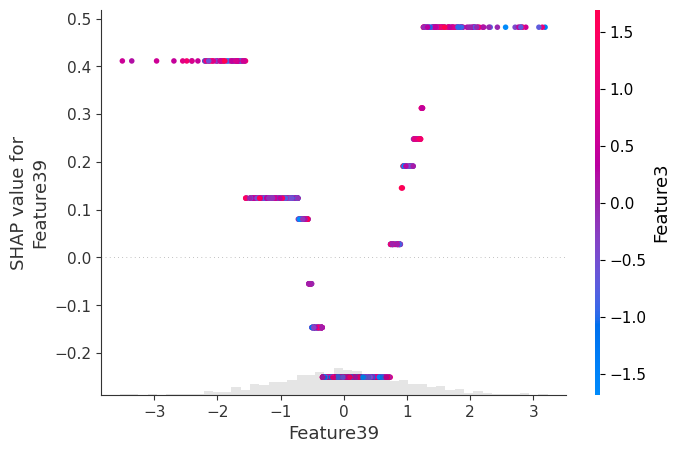

In [45]:
 shap.plots.scatter(shap_values[:, 'Feature39'],color = shap_values[:,'Feature3'])

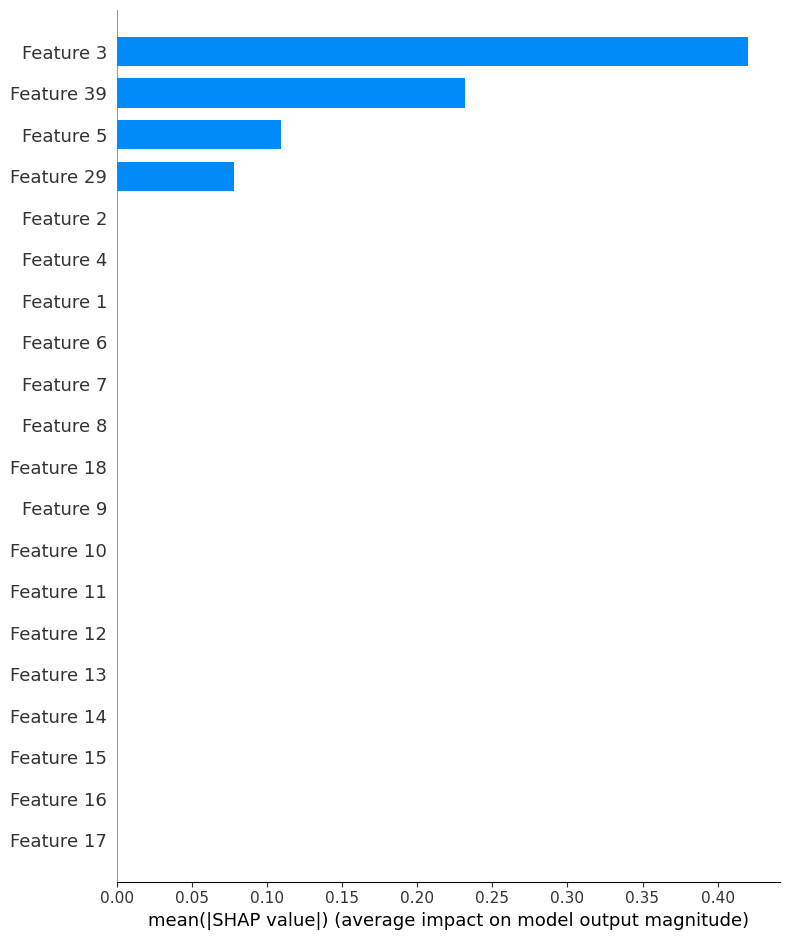

In [46]:
shap.summary_plot(shap_values.values, x_val, plot_type = 'bar')

In [47]:
explainer.expected_value

-0.06418301520636305

In [48]:
shap_sum = shap_values.values.sum(axis = 1) + explainer.expected_value

In [49]:
shap_sum.shape

(1000,)

In [52]:
shap_sum_probability = 1 + (1 + np.exp(-1*shap_sum))

In [53]:
y_predict_prob = xgb_mode_3.predict_proba(x_val)[:,1]

In [54]:
y_predict_prob.shape

(1000,)

In [55]:
df_check = pd.DataFrame({'SHAP sum':shap_sum_probability, 'predicted prob': y_predict_prob})

In [57]:
df_check.sample(5, random_state= 5)

,SHAP sum,predicted prob
544,2.608180,0.621821
515,4.445073,0.290270
193,2.469583,0.680465
11,5.444445,0.225000
279,3.274340,0.439688


In [58]:
np.allclose(df_check['SHAP sum'], df_check['predicted prob'])

False